In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Define the path to your data folder
data_path = 'F:\CN-Agentic-IDS\data'

# List the files we want to load. Let's start with Monday's benign traffic and Tuesday's Brute Force attack.
files_to_load = [
    'Benign-Monday-no-metadata.parquet',
    'Bruteforce-Tuesday-no-metadata.parquet'
]

# Load each file into a DataFrame and store them in a list
dfs = []
for file in files_to_load:
    file_full_path = os.path.join(data_path, file)
    print(f"Loading {file_full_path}...")
    df_temp = pd.read_parquet(file_full_path)
    dfs.append(df_temp)

# Concatenate all the DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

print("\nData loaded and combined successfully!")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\samee\AppData\Local\Temp\ipykernel_29052\77636811.py:2: SyntaxWarning: invalid escape sequence '\C'
  data_path = 'F:\CN-Agentic-IDS\data'


Loading F:\CN-Agentic-IDS\data\Benign-Monday-no-metadata.parquet...
Loading F:\CN-Agentic-IDS\data\Bruteforce-Tuesday-no-metadata.parquet...

Data loaded and combined successfully!


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [3]:
# Get a concise summary of the DataFrame
df.info()

# Get the dimensions of the DataFrame (rows, columns)
print(f"\nDataset shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848545 entries, 0 to 848544
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  848545 non-null  int8   
 1   Flow Duration             848545 non-null  int32  
 2   Total Fwd Packets         848545 non-null  int32  
 3   Total Backward Packets    848545 non-null  int32  
 4   Fwd Packets Length Total  848545 non-null  int32  
 5   Bwd Packets Length Total  848545 non-null  int32  
 6   Fwd Packet Length Max     848545 non-null  int16  
 7   Fwd Packet Length Min     848545 non-null  int16  
 8   Fwd Packet Length Mean    848545 non-null  float32
 9   Fwd Packet Length Std     848545 non-null  float32
 10  Bwd Packet Length Max     848545 non-null  int16  
 11  Bwd Packet Length Min     848545 non-null  int16  
 12  Bwd Packet Length Mean    848545 non-null  float32
 13  Bwd Packet Length Std     848545 non-null  f

In [4]:
# Check for infinite values and replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify that there are no more null values
print(f"Null values remaining: {df.isnull().sum().sum()}")
print(f"New dataset shape: {df.shape}")

Null values remaining: 0
New dataset shape: (848545, 78)


In [10]:
# Let's look at the available columns to make sure they match our list
print("Available columns:")
print(df.columns)

# Select a subset of features using the EXACT column names from the printout.
selected_features = [
    # 'Destination Port', # This column seems to be missing, we will proceed without it for now.
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Fwd Packets Length Total',  # Note: The name is 'Fwd Packets Length Total', not 'Total Length of...'
    'Bwd Packets Length Total',  # Note: The name is 'Bwd Packets Length Total', not 'Total Length of...'
    'Fwd Packet Length Max',
    'Bwd Packet Length Max',
    'Flow IAT Mean',
    'Flow IAT Std',
    'Flow IAT Max',
    'Flow IAT Min',
    'Fwd IAT Total',
    'Label'                      # The label column is crucial
]

# A quick check to make sure all our selected names exist in the DataFrame columns
missing_cols = [col for col in selected_features if col not in df.columns]
if missing_cols:
    print(f"\nError: The following columns are still missing: {missing_cols}")
else:
    print("\nSuccess! All selected feature columns were found.")
    df_subset = df[selected_features].copy()
    display(df_subset.head())

Available columns:
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Fl

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Bwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Label
0,4,2,0,12,0,6,0,4.000000,0.000000,4,4,4,Benign
1,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1,Benign
2,3,2,0,12,0,6,0,3.000000,0.000000,3,3,3,Benign
3,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1,Benign
4,609,7,4,484,414,233,207,60.900002,115.194954,381,2,609,Benign


In [11]:
# Check the different types of labels and their counts
print("Label distribution before encoding:")
print(df_subset['Label'].value_counts())

# Create a new binary label: 0 for Benign, 1 for everything else (anomalies/attacks)
# CORRECTED: Changed 'BENIGN' to 'Benign' to match the actual label in the data.
df_subset['is_attack'] = np.where(df_subset['Label'] == 'Benign', 0, 1)

# Drop the original text label column
df_subset.drop('Label', axis=1, inplace=True)

# Check the distribution of our new binary label
print("\nBinary label distribution:")
print(df_subset['is_attack'].value_counts())

# Display the final DataFrame head
print("\nFinal DataFrame for modeling:")
display(df_subset.head())

Label distribution before encoding:
Label
Benign         839395
FTP-Patator      5931
SSH-Patator      3219
Name: count, dtype: int64

Binary label distribution:
is_attack
0    839395
1      9150
Name: count, dtype: int64

Final DataFrame for modeling:


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Bwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,is_attack
0,4,2,0,12,0,6,0,4.000000,0.000000,4,4,4,0
1,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1,0
2,3,2,0,12,0,6,0,3.000000,0.000000,3,3,3,0
3,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1,0
4,609,7,4,484,414,233,207,60.900002,115.194954,381,2,609,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Separate features (X) and the ground truth label (y)
X = df_subset.drop('is_attack', axis=1)
y = df_subset['is_attack']

# --- NEW: SCALE THE FEATURES ---
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the feature data and transform it
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# -----------------------------

# Create a new DataFrame containing ONLY the benign (normal) traffic for training
# We use the scaled data now.
X_train_normal_scaled = X_scaled[y == 0]

print("Original data head:")
display(X.head())
print("\nScaled data head:")
display(X_scaled.head())
print(f"\nShape of our training data (only normal traffic): {X_train_normal_scaled.shape}")

Original data head:


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Bwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total
0,4,2,0,12,0,6,0,4.000000,0.000000,4,4,4
1,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1
2,3,2,0,12,0,6,0,3.000000,0.000000,3,3,3
3,1,2,0,12,0,6,0,1.000000,0.000000,1,1,1
4,609,7,4,484,414,233,207,60.900002,115.194954,381,2,609



Scaled data head:


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Bwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total
0,-0.392554,-0.011026,-0.011448,-0.092495,-0.007966,-0.412433,-0.543173,-0.225820,-0.273104,-0.326657,-0.070337,-0.383756
1,-0.392555,-0.011026,-0.011448,-0.092495,-0.007966,-0.412433,-0.543173,-0.225821,-0.273104,-0.326657,-0.070338,-0.383756
2,-0.392554,-0.011026,-0.011448,-0.092495,-0.007966,-0.412433,-0.543173,-0.225820,-0.273104,-0.326657,-0.070337,-0.383756
3,-0.392555,-0.011026,-0.011448,-0.092495,-0.007966,-0.412433,-0.543173,-0.225821,-0.273104,-0.326657,-0.070338,-0.383756
4,-0.392535,-0.005733,-0.008267,-0.018886,-0.007820,0.053391,-0.306600,-0.225809,-0.273085,-0.326631,-0.070337,-0.383736



Shape of our training data (only normal traffic): (839395, 12)


In [19]:
# Initialize the Isolation Forest model with a manually set contamination
# We calculate the actual percentage of attacks in our dataset: 9150 / 848545 ≈ 0.011
contamination_rate = 0.011

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=contamination_rate, # Manually setting the expected anomaly rate
    random_state=42,
    n_jobs=-1
)

print(f"Training the Isolation Forest model with contamination set to {contamination_rate}...")
# Train the model on the SCALED normal data
iso_forest.fit(X_train_normal_scaled)

print("Model training complete!")

Training the Isolation Forest model with contamination set to 0.011...
Model training complete!


Classification Report:
              precision    recall  f1-score   support

  Benign (0)       1.00      0.00      0.00    839395
  Attack (1)       0.01      1.00      0.02      9150

    accuracy                           0.01    848545
   macro avg       0.51      0.50      0.01    848545
weighted avg       0.99      0.01      0.00    848545


Confusion Matrix:
[[   967 838428]
 [     0   9150]]


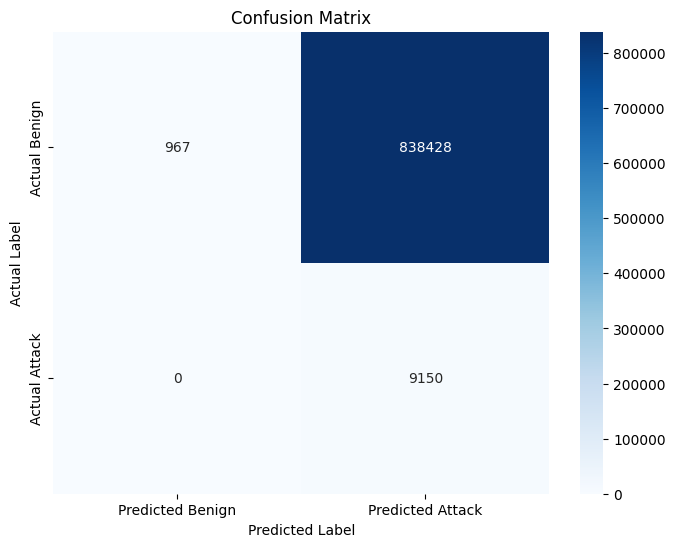

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the entire dataset (X)
# The model will predict -1 for anomalies and 1 for normal instances.
predictions = iso_forest.predict(X)

# We need to convert our model's predictions (-1, 1) to match our labels (1, 0)
# Model's -1 (anomaly) should be our 1 (is_attack)
# Model's  1 (normal)  should be our 0 (not attack)
predictions_mapped = np.where(predictions == -1, 1, 0)

# --- Evaluation ---
print("Classification Report:")
print(classification_report(y, predictions_mapped, target_names=['Benign (0)', 'Attack (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y, predictions_mapped)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Benign', 'Predicted Attack'], yticklabels=['Actual Benign', 'Actual Attack'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import joblib
import os

# Define the directory to save the models
model_dir = '../models/'
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the file paths
model_path = os.path.join(model_dir, 'anomaly_detector.joblib')
scaler_path = os.path.join(model_dir, 'scaler.joblib')

# Save the trained model
joblib.dump(iso_forest, model_path)
print(f"Model saved to {model_path}")

# Save the scaler
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Model saved to ../models/anomaly_detector.joblib
Scaler saved to ../models/scaler.joblib
